<a href="https://colab.research.google.com/github/bhuv-z/predict-future-sales/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('content')

Mounted at content


In [3]:
os.chdir("content/MyDrive/Kaggle_Projects/Predict_Future_Sales/competitive-data-science-predict-future-sales/")

In [4]:
ls

item_categories.csv  sales_train.csv        shops.csv
items.csv            sample_submission.csv  test.csv


In [5]:
items = pd.read_csv("items.csv")
item_categories = pd.read_csv("item_categories.csv")
shops = pd.read_csv("shops.csv")

In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
sample_train = pd.read_csv("sales_train.csv") 

In [ ]:
sample_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


* item_cnt_day
 * +ve : Sold
 * -ve : Returned


- For every shop
    - For every Item
        - The sale was recorded for every date_block_num

Text(0, 0.5, 'Total overall sales')

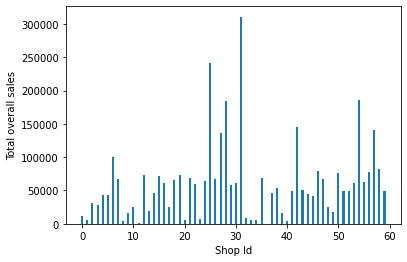

In [18]:
shop_sales = sample_train.groupby("shop_id")["item_cnt_day"].sum()
plt.bar(shop_sales.keys(), shop_sales.values, width=0.4)
plt.xlabel("Shop Id")
plt.ylabel("Total overall sales")

In [ ]:
shop_sales = sample_train.groupby(["shop_id", "", "date_block_num"])["item_cnt_day"].sum()
plt.bar(shop_sales.keys(), shop_sales.values, width=0.4)
plt.xlabel("Shop Id")
plt.ylabel("Total overall sales")
# TBC

In [32]:
test = pd.read_csv("test.csv")
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [37]:
len(test.item_id.unique())

5100

In [38]:
ss = pd.read_csv("sample_submission.csv")

In [ ]:
# https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data